In [62]:
import warnings
warnings.simplefilter(action='ignore', category=Warning)
import os, sys
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt
import diopy
import pandas as pd

In [63]:
data_path = '../../data'

In [64]:
scrna = os.path.join(data_path, 'temp_objects', 'AvrRpt2_alone.h5')

In [65]:
adata = diopy.input.read_h5(file = scrna)

In [66]:
adata.obs = adata.obs[[i for i in adata.obs.columns if 'pANN' not in i]]
adata.obs = adata.obs[[i for i in adata.obs.columns if 'DF.classifications' not in i]]

In [68]:
rep2_pseudotime_adata = sc.read(os.path.join(data_path, 'temp_objects', 'seq_pseudotime_01.h5ad'))

In [69]:
replcate2_adata_subset = rep2_pseudotime_adata[~rep2_pseudotime_adata.obs.index.str.contains('rep2')]

In [70]:
nomenclature_dictionary = {'00_col_Mock_rep1': '00_Mock', 
                           'col_AvrRpt2_04h_rep1': 'AvrRpt2_04h', 
                           'col_AvrRpt2_06h_rep1': 'AvrRpt2_06h',
                           'col_AvrRpt2_09h_rep1': 'AvrRpt2_09h',
                           'col_AvrRpt2_24h_rep1': 'AvrRpt2_24h'}

In [71]:
new_index = pd.Series(replcate2_adata_subset.obs.index.values)

for key, value in nomenclature_dictionary.items():
    print(key, value)
    new_index = new_index.str.replace(key, value)


00_col_Mock_rep1 00_Mock
col_AvrRpt2_04h_rep1 AvrRpt2_04h
col_AvrRpt2_06h_rep1 AvrRpt2_06h
col_AvrRpt2_09h_rep1 AvrRpt2_09h
col_AvrRpt2_24h_rep1 AvrRpt2_24h


In [74]:
replcate2_adata_subset.obs.index = new_index.values

In [75]:
pseudotime_df = replcate2_adata_subset.obs['dpt_pseudotime']

In [78]:
adata.obs = adata.obs.merge(pseudotime_df, left_index=True, right_index=True, how='left')

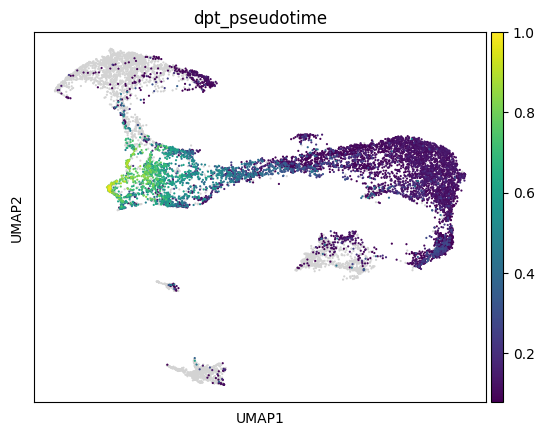

In [79]:
sc.pl.umap(adata, color=['dpt_pseudotime'], vmax=1, legend_loc= 'on data')

In [80]:
pseudotime_csv = pd.DataFrame(adata.obs['dpt_pseudotime'])

In [81]:
pseudotime_csv.to_csv(os.path.join(data_path, 'temp_objects', 'pseudotime_csv.csv'))